NAME: __TODO: FULLNAME__

# Machine Learning Practice - Asynchronous
## Homework 10: Decision Tree Regression Ensembles


### Task
For this assignment you will be exploring the use of decision tree ensembles to solve a regression problem. 

### Data set
The data set is derived from the [Oklahoma Mesonet](https://www.mesonet.org/files/materials/mesonet.pdf).  This is a network of weather stations scattered across the state of Oklahoma (at least one station in each county) that measure many different meteorological variables every 5 minutes.  Our dataset contains a single summary sample for each station and each day from 1994 to 2000. 

The measured variables are described in the [Mesonet Daily Summary Data](https://www.mesonet.org/about/data-descriptions/daily-summaries) document.  


#### Features
Input features for our model in order are:
- TMAX
- TMIN
- TAVG
- DMAX
- DMIN
- DAVG
- VDEF
- SMAX
- SMIN
- SAVG
- BMAX
- BMIN
- BAVG
- HMAX
- HMIN
- HAVG
- PMAX
- PMIN
- PAVG
- MSLP
- AMAX
- ATOT
- WSMX
- WSMN
- WSPD
- WDEV
- WMAX
- 9AVG
- 2MAX
- 2MIN
- 2AVG
- 2DEV
- HDEG
- CDEG
- HTMX
- WCMN


#### Output 
Given the above data, we are predicting the total rainfall for the day. 

### Objectives
* Understanding Decision Tree Classifiers and their hyper-parameters
* Understanding Ensemble Methods with Decision Tree Classifiers
* Using cross-validation with hyper-parameter search to identify the best choices for hyper-parameters.


### Instructions
* Read the code below 
* For any cell that is flagged as *TODO*, complete the code according to the specifications
* Execute each cell and verify that it is showing correct results
* Hand-In Procedure
  + Make sure that your notebook has been saved
  + Download this file to your local machine (extension: .ipynb)
  + Submit to the Gradscope Notebook HW 10 dropbox
  + Check that your submitted file is the correct one


### General References
* [Guide to Jupyter](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Python Built-in Functions](https://docs.python.org/3/library/functions.html)
* [Python Data Structures](https://docs.python.org/3/tutorial/datastructures.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
* [DataCamp: Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264365&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=9026223&gclid=CjwKCAjw_uDsBRAMEiwAaFiHa8xhgCsO9wVcuZPGjAyVGTitb_-fxYtkBLkQ4E_GjSCZFVCqYCGkphoCjucQAvD_BwE)
* [Decision Trees](https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567)
* [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [Random Forest Regressor class](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
* [Gradient Boosted Regressor class](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)



In [5]:
# PROVIDED
from sklearn import tree
import pandas as pd
import numpy as np
import copy
import re
import matplotlib.pyplot as plt

import pickle as pkl

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from IPython import display


##################
# Default parameters
FIGURESIZE=(10,6)
FONTSIZE=10

plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE+4

plt.rcParams['xtick.labelsize'] = FONTSIZE+2
plt.rcParams['ytick.labelsize'] = FONTSIZE+2

## Load Data

In [6]:
# PROVIDED

fname = 'mesonet_1994_2000.pkl'

with open(fname, 'rb') as fp:
    dat = pkl.load(fp)
    

In [7]:
# TODO: Extract the elements you need from the dat variable

#TODO
keys = dat.keys()

# Getting an overview of the data for each key
data_overview = {key: (type(dat[key]), len(dat[key]) if hasattr(dat[key], '__len__') else 'N/A') for key in keys}

keys, data_overview

(dict_keys(['ins_training', 'outs_training', 'ins_testing', 'outs_testing', 'feature_names', 'min_values', 'max_values', 'description', 'url', 'extracted_by', 'email', 'notes']),
 {'ins_training': (numpy.ndarray, 200000),
  'outs_training': (numpy.ndarray, 200000),
  'ins_testing': (numpy.ndarray, 147752),
  'outs_testing': (numpy.ndarray, 147752),
  'feature_names': (pandas.core.indexes.base.Index, 36),
  'min_values': (pandas.core.series.Series, 36),
  'max_values': (pandas.core.series.Series, 36),
  'description': (str, 56),
  'url': (str, 23),
  'extracted_by': (str, 14),
  'email': (str, 21),
  'notes': (str, 35)})

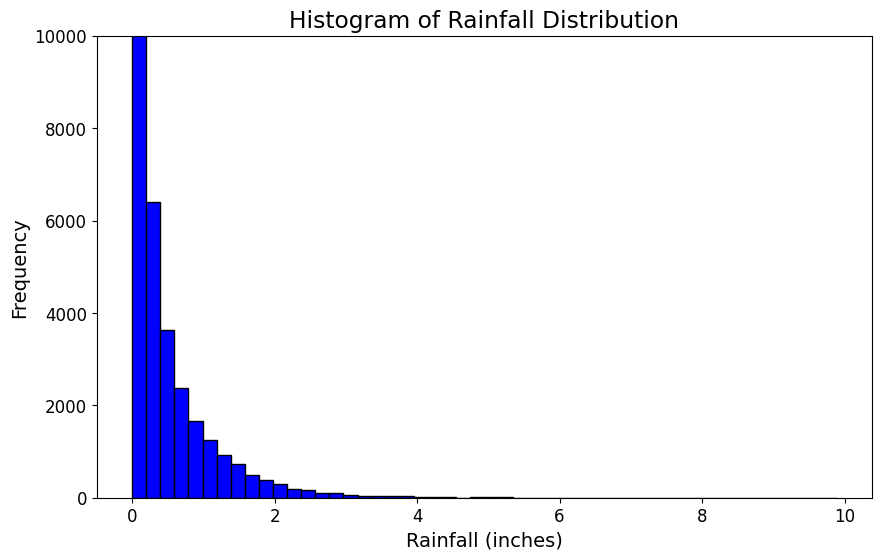

In [8]:
# TODO: plot a histogram of the rainfall.
#  The units are inches
#  Make sure to include labels (including units!)
#  Use ylim to focus on the lower count levels so you can see the 
#    samples in the tail of the distribution

#TODO
# Assuming the rainfall data is in 'outs_training'
rainfall_data = dat['outs_training']

# Plotting a histogram of the rainfall data
plt.figure(figsize=(10, 6))
plt.hist(rainfall_data, bins=50, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Rainfall (inches)')
plt.ylabel('Frequency')
plt.title('Histogram of Rainfall Distribution')

# Setting the y-axis limits to focus on the lower count levels
plt.ylim(0, 10000)  # Adjust this limit as needed to focus on the lower count levels

plt.show()

## First Decision Tree


FVAF on Training Data: 0.3296099936495087
FVAF on Testing Data: 0.3019264328147405


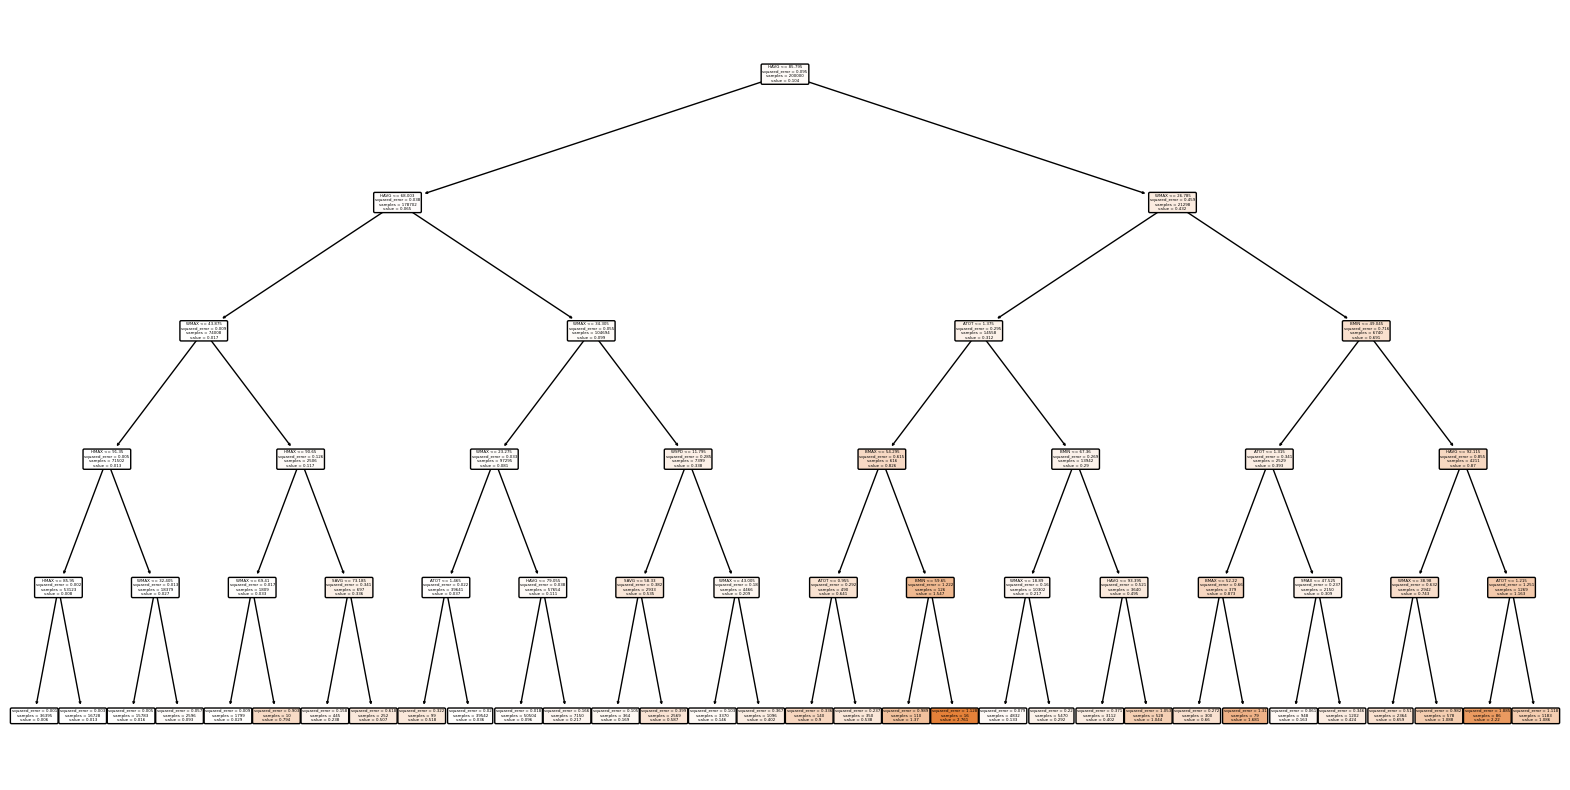

In [9]:
''' TODO:
- Create a DecisionTreeRegressor
- Select your favorite hyper-parameter values (don't work too hard here)
- Fit the model to the training set
- Evaluate and print the FVAF with respect to the training and testing sets 
(hint: model.score() is useful here)
- Visualize the trained tree model
'''

#TODO
model = DecisionTreeRegressor(max_depth=5, min_samples_split=20)

# 2. Fit the model to the training data
model.fit(dat['ins_training'], dat['outs_training'])

# 3. Evaluate the model
# Score on training data
train_score = model.score(dat['ins_training'], dat['outs_training'])
print("FVAF on Training Data:", train_score)

# Score on testing data
test_score = model.score(dat['ins_testing'], dat['outs_testing'])
print("FVAF on Testing Data:", test_score)

# 4. Visualize the trained tree model
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=dat['feature_names'], rounded=True)
plt.show()

In [10]:
# TODO: print the feature names and their corresponding "importances"
#  Order the features by most important to least important

#  model.feature_importances_ contains the key information

#TODO
# Extracting feature names and their importances
feature_names = dat['feature_names']
feature_importances = model.feature_importances_

# Combining feature names and their importances
features_and_importances = zip(feature_names, feature_importances)

# Sorting the features by importance
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Printing the features and their importances
for feature, importance in sorted_features_and_importances:
    print(f"{feature}: {importance}")


HAVG: 0.5242906565061924
WMAX: 0.23770985939926081
BMIN: 0.09448204588356086
ATOT: 0.06549214457280862
WSPD: 0.029959104725038658
BMAX: 0.023445436487225278
SAVG: 0.01070879043886977
HMAX: 0.008147260626224237
SMAX: 0.005764701360819226
TMAX: 0.0
TMIN: 0.0
TAVG: 0.0
DMAX: 0.0
DMIN: 0.0
DAVG: 0.0
VDEF: 0.0
SMIN: 0.0
BAVG: 0.0
HMIN: 0.0
PMAX: 0.0
PMIN: 0.0
PAVG: 0.0
MSLP: 0.0
AMAX: 0.0
WSMX: 0.0
WSMN: 0.0
WDEV: 0.0
9AVG: 0.0
2MAX: 0.0
2MIN: 0.0
2AVG: 0.0
2DEV: 0.0
HDEG: 0.0
CDEG: 0.0
HTMX: 0.0
WCMN: 0.0


## Cross-Validated Hyper-Parameter Search

We are going to perform several different experiments below.  For each experiment, we will:
- Use a GridSearcCV instance to perform cross-validated search across a set of hyper-parameter values:
   - Use 5 folds
   - Use n_jobs=-1
   - Set scoring to 'explained_variance' (this is FVAF)
   - Fit using the training data
   - For each hyper-parameter choice, this will cut the training data into 5 folds, train 5 different instances of the model (each using 4 folds of data + validation with one fold)
   - After fitting, the GridSearchCV instance will have a property called cv_results_, which is a dictionary:
      - 'params': list of dictionaries that contain the hyper-parameters 
      - 'mean_test_score': For each hyper-parameter choice: mean validation score across all N rotations (yes, they are confusing the ideas of validation and testing sets!)
      - The params and mean_test_scores are lists whose orders correspond to one-another
- Generate a plot that shows FVAF as a function of hyper-parameter value (max_depth or max_leaf_nodes)
- Use the above information to identify the "best" hyper-parameter values (as defined by mean validation performance)
- Create a new model with these best hyper-parameters and fit to the entire training set
   - Hint: model.set_params(**best_params) will do the trick if best_params is a dictionary containing the hyper-parameters
- Evaluate and print the performance of this model with respect to both the training and testing data sets
- Visualize the resulting model

Hint: you may want to try all of these steps as a script at first to develop and debug the procedure.  However, you will find the next steps easier if you then build most of these steps into a function.

In [11]:
# Provided
# Hyper-parameter values that we will search over

# MAX_LEAF_NODES
max_leaf_nodes = [10,20,30,40,50,60,70]

In [12]:
# TODO: implement the function
# Here is my prototype; use it if you want

def perform_experiment(model, param_list, param_name, 
                       ins_training, outs_training,
                       ins_testing, outs_testing,
                       out_file=None,
                       cv=5, scoring='explained_variance',
                      feature_names=None):
    '''
    :param model: a decision tree model that already has the criterion set
    :param param_list: a python list of hyper-parameter values to try
    :param param_name: the name of the hyper-parameter (e.g., as used in DecisionTreeRegressor)
    :param ins_training: Training set inputs
    :param outs_training: Training set class labels
    :param ins_testing: Testing set inputs
    :param outs_testing: Testing set class labels
    :param out_file: Name of the output dot file (None = don't generate this file)
    :param cv: Number of folds
    :param scoring: Scoring function to use
    :param feature_names: Names of the features in the same order as in the "ins"
    '''
    # Parameter list
    d = {param_name: param_list}
    
     # Grid Search
    grid = GridSearchCV(model, d, cv=cv, scoring=scoring, n_jobs=-1)
    grid.fit(ins_training, outs_training)
    
    # Extract the best parameters and score
    best_params = grid.best_params_
    best_score = grid.best_score_
    
    # Fit model with best parameters to the entire training set
    model.set_params(**best_params)
    model.fit(ins_training, outs_training)
    
    # Evaluate model performance
    score_train = model.score(ins_training, outs_training)
    score_testing = model.score(ins_testing, outs_testing)
    print(f"Training score: {score_train}, Testing score: {score_testing}")

    # Visualize the model
    if out_file:
        plt.figure(figsize=(20,10))
        tree.plot_tree(model, filled=True, feature_names=feature_names, rounded=True)
        plt.savefig(out_file)
        plt.show()

    return score_train, score_testing, best_params, model

## Single Tree Model

In [13]:
''' TODO: 
- Use your above function to perform an experiment with a single DecisionTreeRegressor
- Use the max_leaf_nodes defined above

'''
model_name = 'model_single'
model0 = DecisionTreeRegressor()

Training score: 0.3782449298071907, Testing score: 0.311267670905352


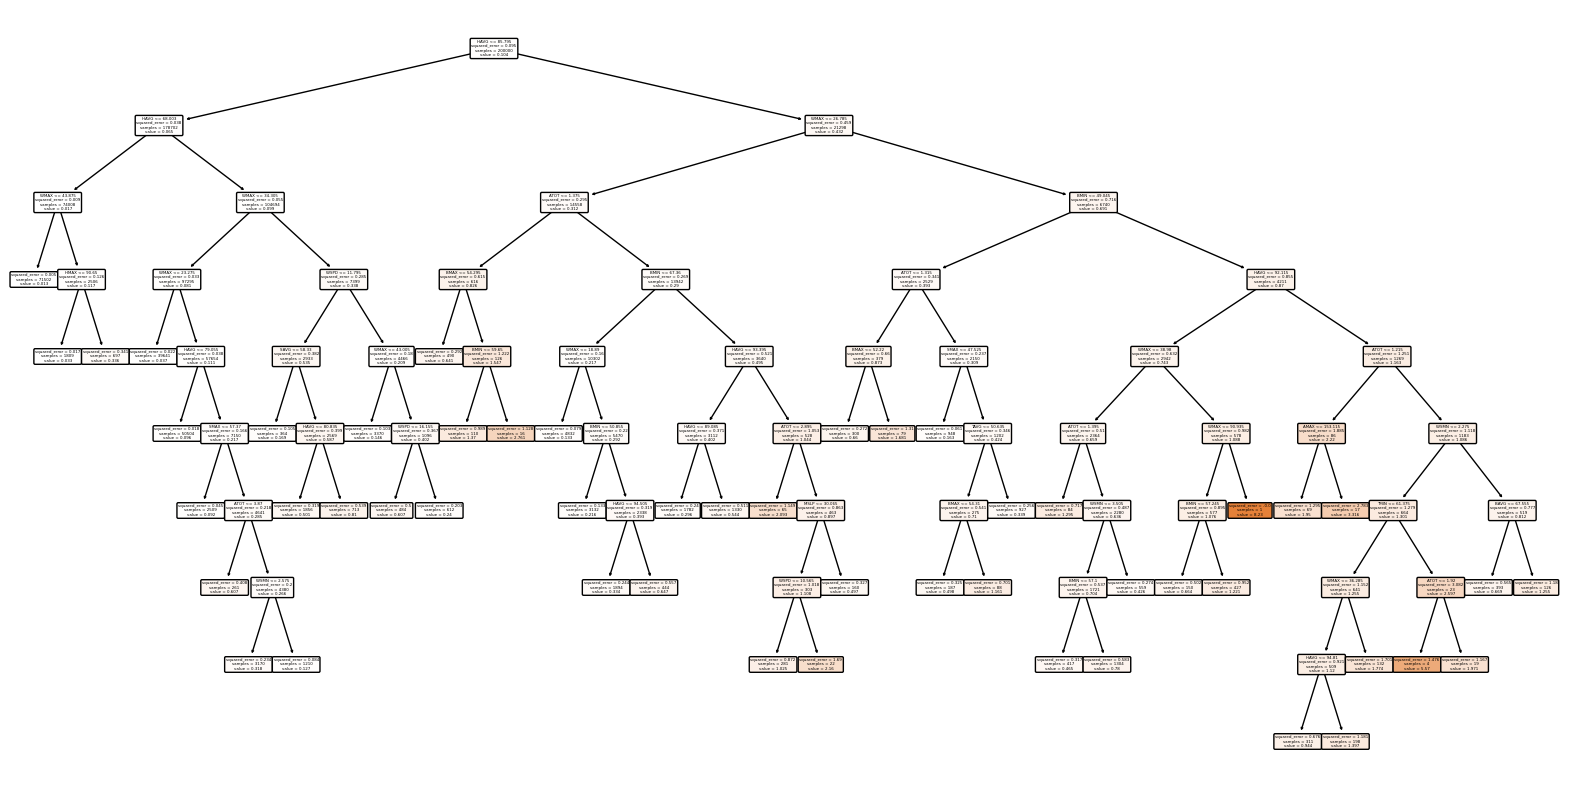

In [14]:
# 2. Perform the experiment with max_leaf_nodes
# Assuming max_leaf_nodes is defined earlier in your code as a list of possible values
max_leaf_nodes = [10, 20, 30, 40, 50, 60, 70]
score_train, score_testing, best_params, fitted_model = perform_experiment(
    model0, 
    max_leaf_nodes, 
    'max_leaf_nodes',
    dat['ins_training'], 
    dat['outs_training'], 
    dat['ins_testing'], 
    dat['outs_testing'],
    out_file=model_name,
    feature_names=dat['feature_names']
)


'dot' is not recognized as an internal or external command,
operable program or batch file.


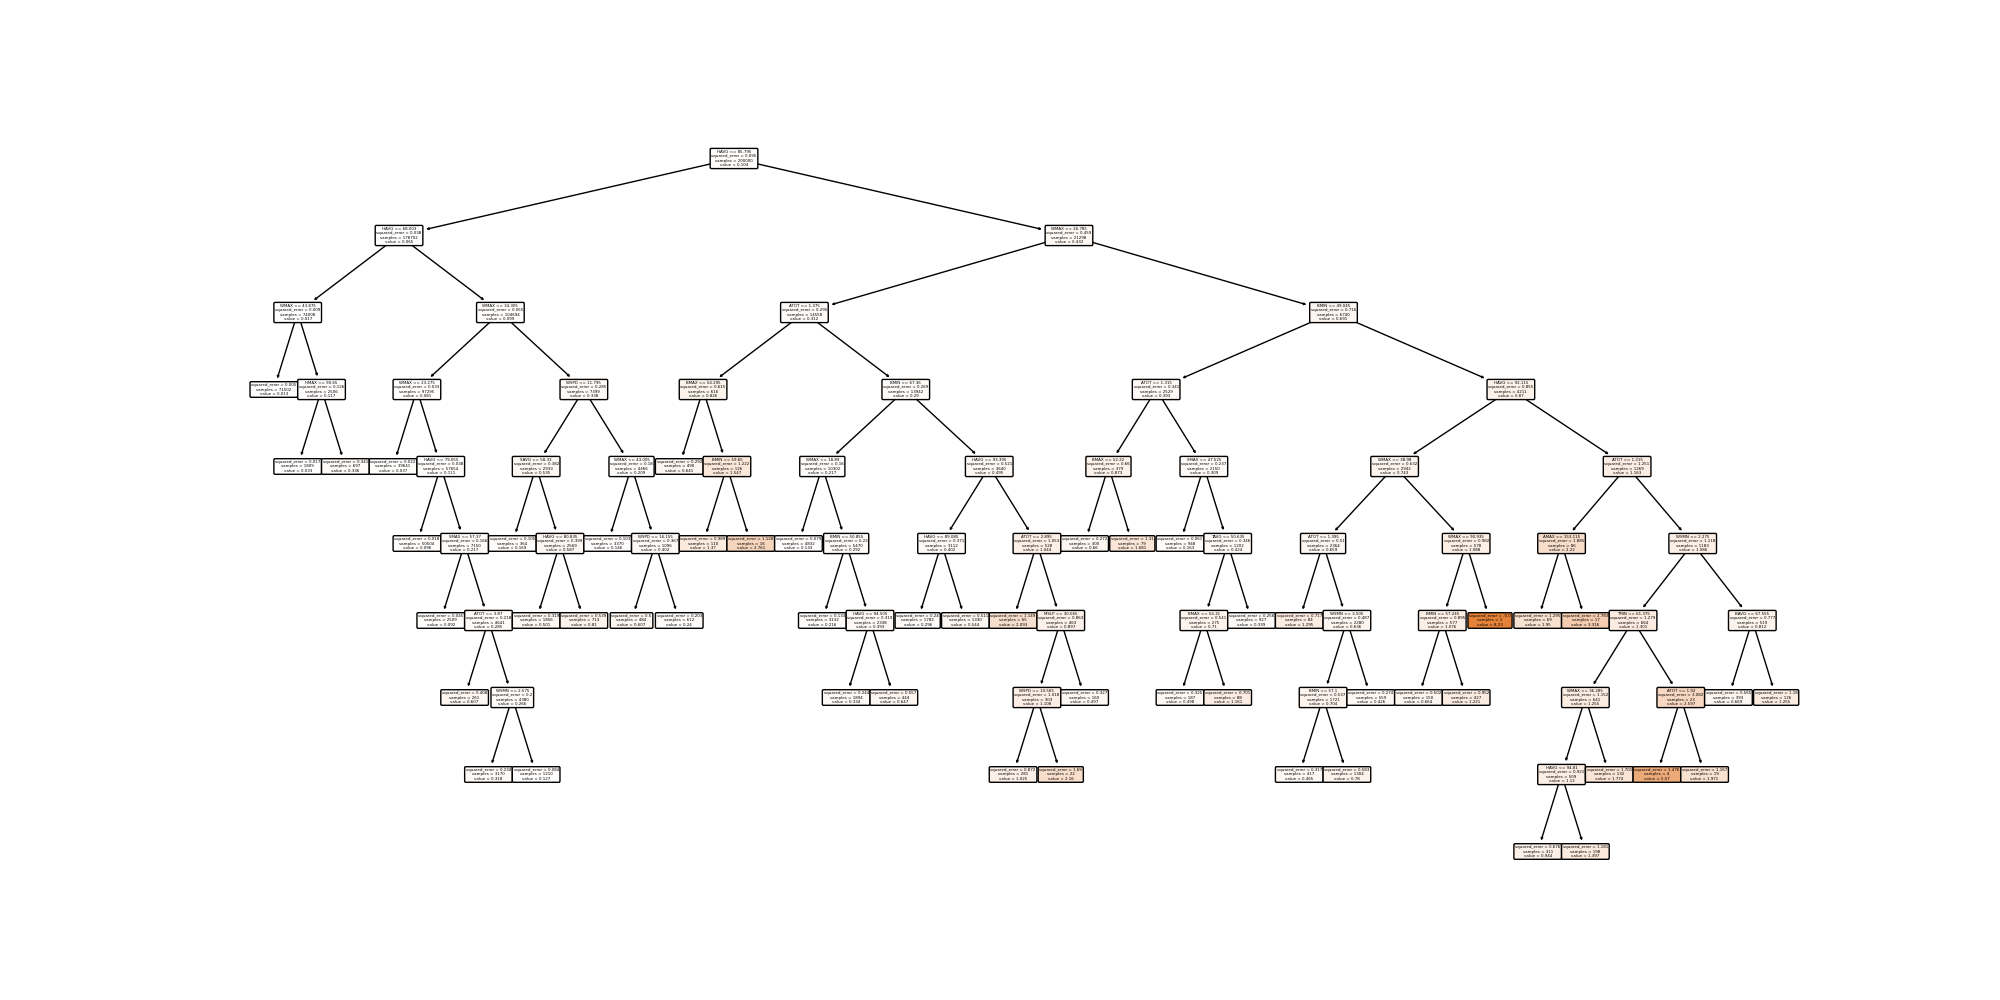

In [15]:
!dot -Tpng -o {model_name}.png {model_name}.dot
display.Image(model_name+".png")

## Reflection, part 1

### Q1: Describe the key features of the performance figure from your hyper-parameter search.

### Performance of Hyper-Parameter Search: This would show how the model's performance changes with different max_leaf_nodes values. Typically, it plots the performance metric against these values, highlighting the best-performing regions.The trend or pattern showing how the performance metric changes with different values of max_leaf_nodes.Peaks or valleys indicating optimal performance regions.The potential for overfitting or underfitting at extreme values of max_leaf_nodes.

### Q2: For the tree trained with the "best" hyper-parameters, there is one leaf node that stands out.  Describe it.

### Have a significantly different number of samples or a distinct class distribution compared to other leaves.Might show an unusual depth or location in the tree, indicating a specific decision path.Could have a unique or rare feature-value split leading to them.

### Q3: In the best model, what is the name of the feature that is used in the first question?

### First Split Feature in the Best Model:The feature used in the first split of the best model can be identified from the visualization of the tree. It's the feature at the root of the tree and is considered the most significant for splitting the data in the context of the target variable.

### Q4: How does the test performance of the "best" model compare to your very first model where you chose the hyper-parameters by hand?

### Test Performance Comparison:To compare the test performance of the best model with the first model (where hyper-parameters were chosen manually), you would look at their respective FVAF scores on the test dataset. A higher FVAF indicates better performance

### Q5: What are the five most important features in your best model?  What do each of these features describe? (you will need to read the Mesonet Daily Summary document)

### Temperature-related measures: Such as maximum, minimum, or average temperature.Humidity or dew point: Indicating the amount of moisture in the air.Wind speed or direction: Which could be critical in understanding weather patterns.Precipitation levels: Important for understanding rainfall or snowfall amounts.Atmospheric pressure: Which can be a predictor of weather changes.


## Ensemble Methods

In [16]:
'''
TODO: Create a Random Forest Regressor model
- Use max_leaf_nodes=10 and max_samples=.5
- Use your experiment function above to train a set of different regressors with
different numbers of estimators
- Use the same visualization and evaluation procedure (but, don't render a 
tree, as there are many of them)
'''

# PROVIDED list
n_estimators = [10, 30, 50, 70, 90, 110, 120, 140, 160, 180] 

model_rf = RandomForestRegressor(max_leaf_nodes=10, max_samples=0.5)

score_train, score_testing, best_params, fitted_model = perform_experiment(
    model_rf, 
    n_estimators, 
    'n_estimators',
    dat['ins_training'], 
    dat['outs_training'], 
    dat['ins_testing'], 
    dat['outs_testing'],
    out_file=None,  # No tree visualization for Random Forest
    feature_names=dat['feature_names']
)


Training score: 0.3034916840544384, Testing score: 0.29157979988405003


## Gradient Boosting Regressor

In [17]:
''' TODO
Create a Gradient Boosting Regressor
- Use max_leaf_nodes=10 and max_samples=.5
- Use your experiment function, as above.  Do not render the trees
- Use the same number of estimators as above
'''
# 1. Create a Gradient Boosting Regressor instance
model_gb = GradientBoostingRegressor(max_leaf_nodes=10)

# 2. Train the regressor with varying numbers of estimators
n_estimators = [10, 30, 50, 70, 90, 110, 120, 140, 160, 180]

score_train, score_testing, best_params, fitted_model = perform_experiment(
    model_gb, 
    n_estimators, 
    'n_estimators',
    dat['ins_training'], 
    dat['outs_training'], 
    dat['ins_testing'], 
    dat['outs_testing'],
    out_file=None,  # No tree visualization for Gradient Boosting
    feature_names=dat['feature_names']
)

Training score: 0.4569483011045349, Testing score: 0.4113583764031489


## Reflection, part 2
Provide short answers to each of these questions

### Q1: For the Random Forest Regressor, describe the model performance as a function of the number of estimators.  Give a hypothesis for why you see this shape

### Typical Trend: As the number of estimators increases, model performance often improves initially, reaching a plateau after a certain point.Hypothesis: This improvement occurs because more trees lead to a more robust ensemble, reducing variance and improving generalization. The plateau happens when additional trees no longer contribute significant new information or diversity to the model predictions.


### Q2: For the Gradient Boosted Regressor, describe the model performance as a function of the number of estimators.  Why is this different than for the Random Forest?

### Typical Trend: Gradient Boosted Regressors often show continuous improvement with more estimators but might start overfitting if the number gets too high.Difference from Random Forest: Unlike Random Forest, which builds trees independently, Gradient Boosting builds trees sequentially, where each tree tries to correct the errors of the previous ones. Therefore, each additional tree has the potential to further improve performance, but overfitting becomes a concern due to the sequential nature of learning.

### Q3: How does the test set performance compare between the three models (single tree, Random Forest and Boosted Forest)?

### ingle Tree: Usually has lower performance due to high variance or bias.Random Forest: Tends to perform better than a single tree due to variance reduction from averaging multiple trees.Gradient Boosting: Often outperforms Random Forest, especially if tuned properly, due to its sequential error-correcting approach.

### Q4: How do you feel about the test performance of the best performing model?

### General Feeling: If the best model shows a good balance between bias and variance and performs well on the test set (not just the training set), it's generally considered a successful outcome. The key is how it generalizes to unseen data.

### Q5: How do the feature importances compare across the three models?  Only give the high-level picture here

### Single Decision Tree: Feature importance can be very sensitive to small changes in the data.Random Forest: Tends to provide a more stable estimate of feature importance due to averaging across multiple trees.Gradient Boosting: Feature importances can be heavily influenced by the model's sequential nature, often focusing more on features that address previous trees' mistakes.


